In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# these three imports are aliased as np, pd, and plt by convention
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# other imports can go here
from datetime import datetime
import pytz
import tqdm

In [3]:
from pandas import DataFrame

In [4]:
df = pd.read_csv('revs_scored_jan.tsv', sep='\t', header=0)



Bot revisions are those where `user_is_bot` is true. Question: How many bots made edits in January 2019? (Hint: The name of the user who made the revision is given in the user_text column. I am asking: how many unique 'user_text' values are there for rows where user_is_bot == True? There is a Pandas function that does this, but there are several reasonable approaches.)
===


In [5]:
df.user_is_bot.value_counts()

False    4241207
True      525145
Name: user_is_bot, dtype: int64

In [6]:
# number of unique bot ids

dfnew = df[df.user_is_bot] #all bot revisions
len(dfnew.user_text.value_counts())

105

What % of bots edits are reverted and what % of human edits are reverted?  (Hint: This is already in the notebook.  Read the documentation for the crosstab command.  The column "is_reverted" tells you whether a revisions was reverted or not (according to a very particular discussion of "reverted", which we will discuss later).)
===

In [7]:
# percentage of bot edits reverted: 5%
# percentage of human edits reverted: 10%

pd.crosstab(df.user_is_bot, df.is_reverted, margins=True, normalize='index').round(decimals=3)

is_reverted,False,True
user_is_bot,,
False,0.898,0.102
True,0.950,0.050
All,0.903,0.097


What bot has the most revisions in the dataset? (Hint: already in the notebook. See: pd.DataFrame.value_counts.) What does Cydebot do?  Try to find the original bot approval discussion for Cydebot. (Hint: read about the bot approvals process, find the archived bot approvals list, look for Cydebot. Extra credit: Is Cydebot still running as of June 2021?  If not, what happened to it and why?)

In [8]:
dfnew.user_text.value_counts().head(1)

Cydebot    42742
Name: user_text, dtype: int64

Cydebot looks at discussions about category deletion, then automatically goes through and deletes mentions of those pages after discussions are concluded.

https://en.wikipedia.org/wiki/Special:Contributions/Cydebot
https://en.wikipedia.org/wiki/Wikipedia:Categories_for_discussion/Log/2020_January_2#Bunch_of_journal/magazine_people_categories

Cydebot was banned because it was deleting things even though no consensus was reached in the discussion (linked).

https://en.wikipedia.org/wiki/Wikipedia:Bots/Requests_for_approval/Cydebot_4
^^ approval discussion

Look at some revisions made by Cydebot.  Wikipedia let's you construct URLs with the rev_id directly (which is a poorly documented feature): use this to specifically look at changes made by Cydebot, e.g. https://en.wikipedia.org/w/index.php?diff=879519093  No, but really: what does Cydebot do?
===

In [9]:
dfcydebot = dfnew[dfnew.user_text == 'Cydebot']
print(dfcydebot.columns)

Index(['rev_timestamp', 'page_id', 'rev_id', 'prev_rev_id', 'is_minor',
       'user_text', 'user_id', 'seconds_to_prev', 'curr_bytes', 'delta_bytes',
       'has_edit_summary', 'is_reverted', 'is_revert',
       'is_reverted_to_by_other', 'is_self_reverted', 'is_self_revert',
       'revert_target_id', 'revert_set_size', 'revert_id', 'seconds_to_revert',
       'damaging_pred', 'goodfaith_pred', 'model_version', 'user_is_bot',
       'user_is_trusted', 'user_edit_count', 'page_rev_count',
       'page_namespace', 'is_page_redirect'],
      dtype='object')


In [10]:
# based on a couple of different revision IDs, we can see the Cydebot deletes a lot, and also makes revisions on user's 
# "work-in-progress" pages?
#

dfcydebot.sample(n = 20, random_state=5)

,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,seconds_to_revert,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect
941816,1546843040,735441,877207848,875891343,True,Cydebot,1215485,734710,30167,-1,...,None,0.007642,0.995290,0.4.0,True,True,6478497,22,0,0
1950800,1547419742,33524167,878257530,515722632,True,Cydebot,1215485,198191421,3878,-53,...,None,0.004371,0.996411,0.5.0,True,True,6498141,1,2,0
1919073,1547409788,46668967,878223890,871765748,True,Cydebot,1215485,3584860,4423,-53,...,None,0.008512,0.994446,0.5.0,True,True,6489518,3,0,0
1986355,1547430072,52083893,878294858,745988434,True,Cydebot,1215485,70103796,457,-54,...,None,0.008647,0.993824,0.5.0,True,True,6506416,1,2,0
4610116,1548891737,9552943,881025277,881007372,True,Cydebot,1215485,8219,42289,99,...,None,0.007018,0.995585,0.5.0,True,True,6520517,2685,2,0
959859,1546856584,42324494,877226633,853785019,True,Cydebot,1215485,13256989,4993,7,...,None,0.008010,0.991622,0.4.0,True,True,6478862,2,0,0
1956305,1547421504,51605942,878263261,739382741,True,Cydebot,1215485,73572248,406,-54,...,None,0.008304,0.993848,0.5.0,True,True,6499627,1,2,0
1954749,1547421039,32942163,878261613,872927376,True,Cydebot,1215485,3010133,8768,-53,...,None,0.009397,0.988893,0.5.0,True,True,6499270,24,0,0
1929514,1547413161,50559349,878234767,720606128,True,Cydebot,1215485,83977153,400,-54,...,None,0.008304,0.993908,0.5.0,True,True,6492409,1,2,0
1948261,1547418878,33016428,878254822,570932319,True,Cydebot,1215485,169470792,1188,-53,...,None,0.005866,0.995451,0.5.0,True,True,6497455,1,2,0


First through fifth revisions just deleted categories from pages - Articles Created by Article Wizard. rev ids: 878282326, 878178639, 878225282, 878305994, 878255096

https://en.wikipedia.org/wiki/Wikipedia:Categories_for_discussion/Log/2019_January_6#Category:Articles_created_via_the_Article_Wizard -- discussion from which Cydebot deleted some categories

Note: What is a category? What does it mean to delete it?


The ORES model's prediction of damage is stored in the damaging_pred column. What revision made by Cydebot has the highest ORES damaging score?
===


In [11]:
dfcydebot.damaging_pred.max()

0.08141379906777768

In [12]:
dfcydebot[dfcydebot.damaging_pred > .07]

,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,seconds_to_revert,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect
462491,1546559652,8993145,876709746,876709158,True,Cydebot,1215485,362,0,-337,...,None,0.081414,0.963045,0.4.0,True,True,6477045,3498,2,0
957434,1546854863,13784401,877224110,877223688,True,Cydebot,1215485,340,85,-318,...,None,0.073652,0.961676,0.4.0,True,True,6478578,68254,2,1


Most damaging revision: https://en.wikipedia.org/w/index.php?diff=876709746

Appears to be changing its own page (possibly because it finished deleting these categories?). Why does ORES think this is damaging?

Using Matplotlib, plot a histogram of ORES damaging scores for revisions made by Cydebot.
===

In [13]:
dfcydebot_damaging_score = dfcydebot[["damaging_pred"]]

array([[<AxesSubplot:title={'center':'damaging_pred'}>]], dtype=object)

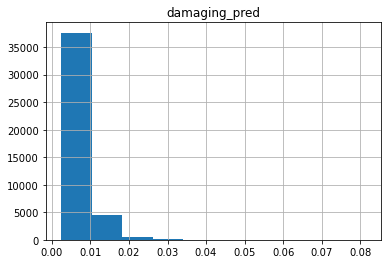

In [14]:
dfcydebot_damaging_score.hist()  

In [15]:
dfcydebot_damaging_score

,damaging_pred
67,0.003268
78,0.010788
1738,0.005640
5301,0.006138
5846,0.005872
...,...
4764319,0.013716
4764333,0.008180
4765042,0.006552
4765058,0.009667


Hard: Using Matplotlib, plot the number of revisions made per day in January 2019 (x-axis is date, y-axis is # of revisions).  The column rev_timestamp gives each revision's original time in number of seconds since the Unix epoch; look up datetime.utcfromtimestamp() and datetime.fromtimestamp(rev_timestamp, pytz.UTC).  Identifying days can be tricky, but the Wikipedia standard is to use UTC.  You'll need to figure out how many revisions occur on each day: I would recommend using np.histogram for this, although you'll need to determine how to form the bin edges. Get the xticks to be somewhat reasonable i.e. dates.
===


In [16]:
df_time = df[["rev_timestamp"]]
df_time

,rev_timestamp
0,1546300800
1,1546300801
2,1546300801
3,1546300801
4,1546300802
...,...
4766347,1548979197
4766348,1548979198
4766349,1548979198
4766350,1548979198


In [17]:
datetime.utcfromtimestamp(1546300801)

datetime.datetime(2019, 1, 1, 0, 0, 1)

In [18]:
datetime.utcfromtimestamp(1548979198).day

31

In [19]:
df_time_day = df_time.applymap(lambda x: datetime.utcfromtimestamp(x).day)

array([[<AxesSubplot:title={'center':'rev_timestamp'}>]], dtype=object)

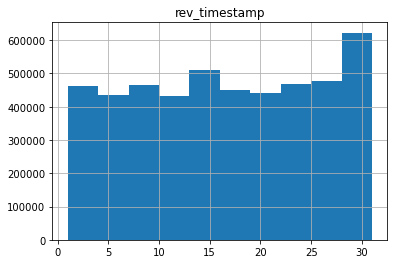

In [20]:
df_time_day.hist()

In [21]:
days = df.rev_timestamp.map(lambda ts: datetime.utcfromtimestamp(ts).day)
df['day'] = days

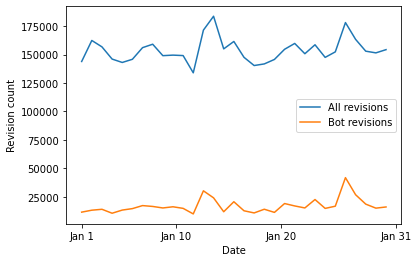

In [22]:
counts, bin_edges = np.histogram(days, bins=len(set(days)))
plt.plot(bin_edges[:-1], counts, label="All revisions")
counts, _ = np.histogram(days[df.user_is_bot], bins=len(set(days)))
plt.plot(bin_edges[:-1], counts, label="Bot revisions")
plt.ylabel("Revision count")
plt.xlabel("Date")
plt.legend()
plt.xticks(ticks=[1, 10, 20, 31], labels=['Jan 1', 'Jan 10', 'Jan 20', 'Jan 31'])
plt.show()

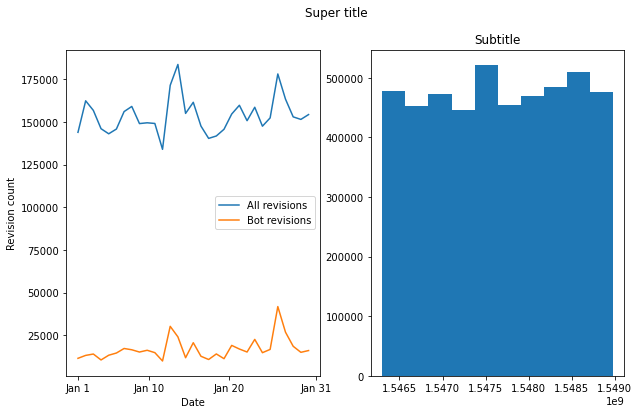

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

ax = axes[0]
counts, bin_edges = np.histogram(days, bins=len(set(days)))
ax.plot(bin_edges[:-1], counts, label="All revisions")
counts, _ = np.histogram(days[df.user_is_bot], bins=len(set(days)))
ax.plot(bin_edges[:-1], counts, label="Bot revisions")
ax.set_ylabel("Revision count")
ax.set_xlabel("Date")
ax.legend()
ax.set_xticks([1, 10, 20, 31])
ax.set_xticklabels(['Jan 1', 'Jan 10', 'Jan 20', 'Jan 31'])

ax = axes[1]
ax.hist(df.rev_timestamp)
fig.suptitle("Super title")
ax.set_title("Subtitle")

plt.show()

In [24]:
np.min(df.rev_timestamp), np.max(df.rev_timestamp)

(1546300800, 1548979199)

In [25]:
datetime.utcfromtimestamp(np.max(df.rev_timestamp)).strftime("%d")

'31'

What bots are most and least reverted?  For the bot users, create a scatter plot of number of revisions and "% of bot revisions that were reverted"; are bots with more total revisions more likely to be reverted?
===

In [26]:
df_sample = dfnew[["user_text","is_revert","is_reverted", "is_reverted_to_by_other", 'is_self_reverted', 'is_self_revert', 'revert_id', 'seconds_to_revert']].sample(n=20, random_state=27)
df_sample

dfcydebot[['user_edit_count']].head()

,user_edit_count
67,6475738
78,6475739
1738,6475740
5301,6475741
5846,6475742


what does column is_self_reverted really mean?
ask Zach about these columns - what do they mean?

In [27]:
grouped_bots = df[df.user_is_bot].groupby('user_text')

bot_df = grouped_bots.agg({
    'rev_id': len,
    'is_reverted': np.sum,
}).rename(columns={
    'rev_id': 'n_revisions',
    'is_reverted': 'n_reverted',
})
bot_df['pct_reverted'] = bot_df.n_reverted / bot_df.n_revisions
bot_df.sort_values(by='pct_reverted', ascending=False).head()

,n_revisions,n_reverted,pct_reverted
user_text,,,
Tom.Bot,2,2,1.000000
Stefan2bot,534,498,0.932584
Theo's Little Bot,1489,1246,0.836803
Lowercase sigmabot II,348,286,0.821839
RonBot,11000,4463,0.405727


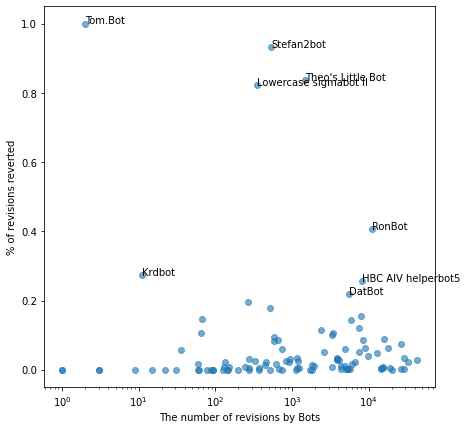

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))

ax.scatter(bot_df.n_revisions, bot_df.pct_reverted, alpha=0.6)

ax.set_xscale('log')
ax.set_ylabel("% of revisions reverted")
ax.set_xlabel("The number of revisions by Bots")

for row in bot_df[bot_df.pct_reverted >= 0.2].itertuples():
    ax.text(row.n_revisions, row.pct_reverted, f'{row.Index}')

plt.show()

Create a histogram of "% of bot revisions that were reverted" for each page_namespace; are bot revision reverts more likely to happen in particular namespaces? (Read about namespaces: https://en.wikipedia.org/wiki/Wikipedia:Namespace. The histogram is different than the type we've seen before; you may want to compute the percentage using pd.crosstab 
===

In [29]:
grouped_bots_namespaces = df[df.user_is_bot].groupby('page_namespace')

namespace_df = grouped_bots_namespaces.agg({
    'rev_id': len,
    'is_reverted': np.sum,
}).rename(columns={
    'rev_id': 'n_revisions',
    'is_reverted': 'n_reverted',
})
namespace_df['pct_reverted'] = namespace_df.n_reverted / namespace_df.n_revisions

namespace_df


,n_revisions,n_reverted,pct_reverted
page_namespace,,,
0,207672,7640,0.036789
1,33137,1873,0.056523
2,91832,4508,0.049090
3,59805,1605,0.026837
4,90941,6216,0.068352
5,2840,70,0.024648
6,8149,3841,0.471346
7,50,0,0.000000
8,5,0,0.000000


In [30]:
grouped_bots_namespaces.head()

,rev_timestamp,page_id,rev_id,prev_rev_id,is_minor,user_text,user_id,seconds_to_prev,curr_bytes,delta_bytes,...,damaging_pred,goodfaith_pred,model_version,user_is_bot,user_is_trusted,user_edit_count,page_rev_count,page_namespace,is_page_redirect,day
4,1546300802,31392285,876227293,876069768,True,Cyberbot I,16266655,86401,125,-1,...,0.011582,0.992475,0.4.0,True,True,1006365,337,10,0,1
6,1546300802,482254,876227295,876119604,False,DYKUpdateBot,11745509,57247,3069,156,...,0.003470,0.997837,0.4.0,True,True,177470,992,10,0,1
38,1546300814,22939069,876227329,876069797,False,DYKUpdateBot,11745509,86400,20,0,...,0.007636,0.991717,0.4.0,True,True,177471,449,10,0,1
39,1546300814,42815388,876227328,875253860,False,SuggestBot,627574,605539,13247,-44,...,0.010113,0.994090,0.4.0,True,True,159447,28,2,0,1
57,1546300821,596522,876227350,876069818,False,DYKUpdateBot,11745509,86400,95045,1831,...,0.003453,0.997173,0.4.0,True,True,177472,467,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500919,1547704297,27911507,878831973,834428253,False,CommonsDelinker,2304267,24753680,2924,1,...,0.009001,0.993549,0.5.0,True,True,653929,1,108,0,17
2840070,1547914951,51207272,879184809,876937610,False,JL-Bot,4773966,1218876,36773,62,...,0.004072,0.997013,0.5.0,True,True,234689,18,108,0,19
4034850,1548584792,57744963,880426414,873640417,True,KolbertBot,31691822,3821131,5406,1,...,0.008936,0.995027,0.5.0,True,True,1138722,5,828,0,27
4036894,1548586142,45068303,880428557,879950292,True,KolbertBot,31691822,253110,237287,1,...,0.015862,0.992203,0.5.0,True,True,1139049,209,828,0,27


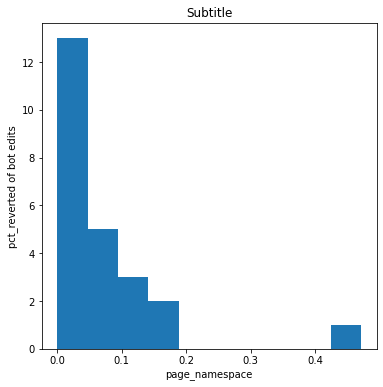

In [31]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

axes.set_ylabel("pct_reverted of bot edits")
axes.set_xlabel("page_namespace")
axes.hist(namespace_df.pct_reverted, bins = 10)
axes.set_title("Subtitle")

plt.show()

In [32]:
namespace_df[namespace_df.pct_reverted>.4]

,n_revisions,n_reverted,pct_reverted
page_namespace,,,
6,8149,3841,0.471346


the most changes happen in namespace 6
https://en.wikipedia.org/wiki/Help:Files

perhaps performing administrative tasks to keep admin lists updated - section 6.4.4 of EGBF rejoinder

Hard: Let's look at WHO is reverting bot revisions.  For now, let's look at one week of bot revisions (from Jan 1 - Jan 7) that were reverted within 24 hours (it's not enough for is_reverted to be True, we ALSO need seconds_to_revert <= 60 * 60 * 24 (which is 24 hours in seconds).).  Every revision for which is_reverted == True has a revert_id, which corresponds to a different revision in the same dataset.  I want to know: which reverted bot revisions were reverted by other bots?  In other words, for which bot revisions is revert_id any rev_id by a bot? (i.e. if botdf = df[df.user_is_bot], then df[df.revert_id.isin(botdf.rev_id)] is every revision reverted by a bot. We don't want every revision, just those revisions that are (1) from bots, (2) reverted within 24 hours, and (3) reverted by a bot.) Finally, which (reverted_bot_username, reverting_bot_username) pairs are most common?  In other words, which bots routinely revert other bots, and which bots are routinely reverted by which other bots?
==

In [33]:
# first thing: isolate data to only data from Jan1-Jan7, reverted w/in 24 hours, revisions by a bot

df_week1 = df[df.day<8]
df_week1_reverted = df_week1[df_week1.is_reverted] # w/o, still include 'none'
df_week1_reverted_in_day = df_week1_reverted[df_week1_reverted.seconds_to_revert.astype('str').astype('int')<86400]
df_bots = df_week1_reverted_in_day[df_week1_reverted_in_day.user_is_bot]
# df_bots = revisions from week 1 which were reverted within 24 hours

In [34]:
# to do next: find which in df_bots match rev_id of where user_is_bot is true?
df_another = df[df.user_is_bot]
df_another = df_another[df_another.is_revert]
df_another[['user_is_bot','is_revert']].sample(n=20)

,user_is_bot,is_revert
1611719,True,True
3054103,True,True
2932328,True,True
4601677,True,True
3125782,True,True
1499944,True,True
1959767,True,True
3311089,True,True
3601816,True,True
4169106,True,True


In [35]:
revert_is_bot_map = {row.rev_id: row.user_is_bot for row in df_another.itertuples()}
len(revert_is_bot_map)

31359

In [36]:
# for all reverted revisions done in 24hrs btw jan. 1 - 7, determine if it was reverted by a bot
# not working?????

# fast way
sdf = df_bots
is_reverting_user_a_bot = []
test = 0
for row in sdf.itertuples():
    if row.revert_id not in revert_is_bot_map:
        test += 1
        continue
    user_is_bot = revert_is_bot_map[row.revert_id]
    is_reverting_user_a_bot.append(user_is_bot)
    
print(test)

3701


In [37]:
len(df_bots)

3701

In [38]:
# attempting slow way

sdf = df_bots
is_reverting_user_a_bot = []
for row in sdf.itertuples():
    res = df_another[df_another.rev_id == int(row.revert_id)]
    if len(res) != 1:
        continue
    user_is_bot = res.rev_id.iloc[0]
    is_reverting_user_a_bot.append(user_is_bot)


In [39]:
len(is_reverting_user_a_bot)

2306

In [40]:
reverting_user_is_bot = DataFrame(is_reverting_user_a_bot,columns=['rev_id'])

In [41]:
reverting_user_is_bot["bot_who_reverted"] = ""

In [42]:
for row in reverting_user_is_bot.itertuples():
    for line in df_another.itertuples():
        if row.rev_id == line.rev_id:
            reverting_user_is_bot.loc[row.Index, 'bot_who_reverted'] = line.user_text 
            break
        
reverting_user_is_bot

,rev_id,bot_who_reverted
0,876373440,Cydebot
1,876227653,Cyberbot I
2,876228467,Cyberbot I
3,876228471,Cyberbot I
4,876229970,Cyberbot I
...,...,...
2301,877410764,ClueBot III
2302,877410765,ClueBot III
2303,877328091,Cydebot
2304,877323116,AvicBot


In [43]:
reverting_user_is_bot["reverted_edit"] = ""
reverting_user_is_bot["reverted_bot_text"] = ""
reverting_user_is_bot

,rev_id,bot_who_reverted,reverted_edit,reverted_bot_text
0,876373440,Cydebot,,
1,876227653,Cyberbot I,,
2,876228467,Cyberbot I,,
3,876228471,Cyberbot I,,
4,876229970,Cyberbot I,,
...,...,...,...,...
2301,877410764,ClueBot III,,
2302,877410765,ClueBot III,,
2303,877328091,Cydebot,,
2304,877323116,AvicBot,,


In [44]:
for row in reverting_user_is_bot.itertuples():
    for line in df_bots.itertuples():
        if row.rev_id == int(line.revert_id):
            reverting_user_is_bot.loc[row.Index, 'reverted_edit'] = line.rev_id 
            reverting_user_is_bot.loc[row.Index, 'reverted_bot_text'] = line.user_text 
            break
        
reverting_user_is_bot

,rev_id,bot_who_reverted,reverted_edit,reverted_bot_text
0,876373440,Cydebot,876227358,Cydebot
1,876227653,Cyberbot I,876227648,Cyberbot I
2,876228467,Cyberbot I,876227653,Cyberbot I
3,876228471,Cyberbot I,876228467,Cyberbot I
4,876229970,Cyberbot I,876228471,Cyberbot I
...,...,...,...,...
2301,877410764,ClueBot III,877317759,ClueBot III
2302,877410765,ClueBot III,877317760,ClueBot III
2303,877328091,Cydebot,877321197,Cydebot
2304,877323116,AvicBot,877322556,AvicBot


In [45]:
df_bots[["rev_id", 'is_reverted', "revert_id", "user_text","is_self_reverted"]].sample(n=20)

,rev_id,is_reverted,revert_id,user_text,is_self_reverted
942663,877208715,True,877275709,RonBot,False
940486,877206467,True,877206524,RonBot,False
922886,877188414,True,877224455,DatBot,False
98833,876329892,True,876330945,Cyberbot I,True
20790,876248682,True,876249303,Cyberbot I,True
493786,876742098,True,876775548,COIBot,True
212925,876447977,True,876457147,AnomieBOT,False
855151,877118388,True,877188468,Ganeshbot,False
941736,877207770,True,877207844,RonBot,False
359490,876601269,True,876601502,HBC AIV helperbot5,False


In [46]:
reverting_user_is_bot["is_self_revert"] = False

for row in reverting_user_is_bot.itertuples():
    if row.bot_who_reverted == row.reverted_bot_text:
        reverting_user_is_bot.loc[row.Index, "is_self_revert"] = True

In [47]:
# the vast majority of bot-bot reverts are self_reverts - perhaps bots cleaning up after themselves?

len(reverting_user_is_bot[reverting_user_is_bot.is_self_revert==True])

2229

In [48]:
reverted_by_other_bot = reverting_user_is_bot[reverting_user_is_bot.is_self_revert==False]

In [49]:
# HBC AIV helperbot often reverts other bots

reverted_by_other_bot.groupby("bot_who_reverted").count()

,rev_id,reverted_edit,reverted_bot_text,is_self_revert
bot_who_reverted,,,,
ClueBot III,2,2,2,2
Cyberbot I,12,12,12,12
HBC AIV helperbot5,56,56,56,56
Hazard-Bot,5,5,5,5
RMCD bot,2,2,2,2


In [50]:
reverted_by_other_bot[reverted_by_other_bot.bot_who_reverted == "HBC AIV helperbot5"]

,rev_id,bot_who_reverted,reverted_edit,reverted_bot_text,is_self_revert
142,876272098,HBC AIV helperbot5,876271728,DatBot,False
294,876301629,HBC AIV helperbot5,876301211,DatBot,False
329,876313839,HBC AIV helperbot5,876311880,DatBot,False
337,876313839,HBC AIV helperbot5,876311880,DatBot,False
385,876325112,HBC AIV helperbot5,876324956,DatBot,False
471,876348163,HBC AIV helperbot5,876347886,DatBot,False
550,876376073,HBC AIV helperbot5,876373901,DatBot,False
566,876382820,HBC AIV helperbot5,876382336,DatBot,False
665,876419920,HBC AIV helperbot5,876417195,DatBot,False
859,876476333,HBC AIV helperbot5,876475082,DatBot,False


In [51]:
# DatBot was often reverted by other bots

reverted_by_other_bot.groupby("reverted_bot_text").count()

,rev_id,bot_who_reverted,reverted_edit,is_self_revert
reverted_bot_text,,,,
AnomieBOT,2,2,2,2
DatBot,53,53,53,53
Lowercase sigmabot II,16,16,16,16
MediaWiki message delivery,2,2,2,2
SineBot,4,4,4,4


In [52]:
reverted_by_other_bot[reverted_by_other_bot.reverted_bot_text == "DatBot"]

,rev_id,bot_who_reverted,reverted_edit,reverted_bot_text,is_self_revert
142,876272098,HBC AIV helperbot5,876271728,DatBot,False
294,876301629,HBC AIV helperbot5,876301211,DatBot,False
329,876313839,HBC AIV helperbot5,876311880,DatBot,False
337,876313839,HBC AIV helperbot5,876311880,DatBot,False
385,876325112,HBC AIV helperbot5,876324956,DatBot,False
471,876348163,HBC AIV helperbot5,876347886,DatBot,False
550,876376073,HBC AIV helperbot5,876373901,DatBot,False
566,876382820,HBC AIV helperbot5,876382336,DatBot,False
665,876419920,HBC AIV helperbot5,876417195,DatBot,False
859,876476333,HBC AIV helperbot5,876475082,DatBot,False


https://en.wikipedia.org/wiki/Wikipedia:Administrator_intervention_against_vandalism
-- AIV page: where helperbot5 often reverts DatBot

https://en.wikipedia.org/wiki/User:DatBot
DatBot's purpose on AIV page: Reports users who hit specific filters

https://en.wikipedia.org/wiki/User:HBC_AIV_helperbot5
helperbot's purpose on AIV page: check if reported users are blocked. If the user is blocked the bot will remove the entry with an edit summary explaining why, for how long, what type of block, and how many remaining reports are left

thus we conclude that they are working together. DatBot reports users. an admin will block them if necessary. once a user is blocked, helperbot5 cleans up the page by removed their name.

To-do
===

* histogram
* subset bot-bot reverts in dif way
* See code written at end, figure out what’s happening and how to rename columns to make sense


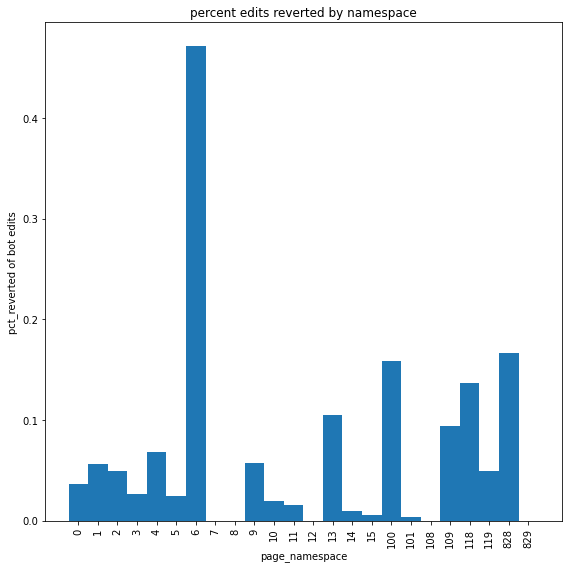

In [53]:
# namespace histogram

fig, axes = plt.subplots(1, 1, figsize=(8, 8))

x = range(len(namespace_df))
axes.bar(x, namespace_df.pct_reverted, width=1)

axes.set_ylabel("pct_reverted of bot edits")
axes.set_xlabel("page_namespace")
axes.set_title("percent edits reverted by namespace")

axes.set_xticks(x)
axes.set_xticklabels([index for index in namespace_df.index], rotation='vertical')

plt.tight_layout()
plt.show()

In [54]:
# df_bots holds reverted stuff within one week by bots
sdf1 = df_bots.loc[df_bots.is_reverted, ["rev_id", "user_text", "revert_id"]]
sdf1.revert_id = sdf1.revert_id.astype('int')

# df_another holds possible reverting changes
sdf2 = df_another[["rev_id", 'user_text']]

what is going on with .loc stuff?
why do we have to pass it the first argument?

In [55]:
# subset bot-bot reverts using merge

x = pd.merge(sdf1, sdf2, 
             how='left', 
             left_on='revert_id', 
             right_on='rev_id', 
             suffixes=('', '_reverter')
)
x.head(20)

,rev_id,user_text,revert_id,rev_id_reverter,user_text_reverter
0,876227358,Cydebot,876373440,876373440.0,Cydebot
1,876227648,Cyberbot I,876227653,876227653.0,Cyberbot I
2,876227653,Cyberbot I,876228467,876228467.0,Cyberbot I
3,876228043,ClueBot NG,876289025,NaN,NaN
4,876228172,SineBot,876289652,NaN,NaN
5,876228467,Cyberbot I,876228471,876228471.0,Cyberbot I
6,876228471,Cyberbot I,876229970,876229970.0,Cyberbot I
7,876229970,Cyberbot I,876229977,876229977.0,Cyberbot I
8,876229977,Cyberbot I,876231616,876231616.0,Cyberbot I
9,876231616,Cyberbot I,876231620,876231620.0,Cyberbot I


probably a way to do the merge and get rid of NaNs at the same time?

In [56]:
x.dropna()

,rev_id,user_text,revert_id,rev_id_reverter,user_text_reverter
0,876227358,Cydebot,876373440,876373440.0,Cydebot
1,876227648,Cyberbot I,876227653,876227653.0,Cyberbot I
2,876227653,Cyberbot I,876228467,876228467.0,Cyberbot I
5,876228467,Cyberbot I,876228471,876228471.0,Cyberbot I
6,876228471,Cyberbot I,876229970,876229970.0,Cyberbot I
...,...,...,...,...,...
3694,877317759,ClueBot III,877410764,877410764.0,ClueBot III
3695,877317760,ClueBot III,877410765,877410765.0,ClueBot III
3697,877321197,Cydebot,877328091,877328091.0,Cydebot
3699,877322556,AvicBot,877323116,877323116.0,AvicBot


In [75]:
bot_pairs = x.groupby(["user_text","user_text_reverter"], as_index = False).count().sort_values("rev_id", ascending=False)
bot_pairs


,user_text,user_text_reverter,rev_id,revert_id,rev_id_reverter
10,Cyberbot I,Cyberbot I,911,911,911
19,HBC AIV helperbot5,HBC AIV helperbot5,316,316,316
12,Cydebot,Cydebot,292,292,292
5,AvicBot,AvicBot,193,193,193
17,EmausBot,EmausBot,133,133,133
21,ListeriaBot,ListeriaBot,108,108,108
28,Reports bot,Reports bot,68,68,68
16,DeltaQuadBot,DeltaQuadBot,57,57,57
15,DatBot,HBC AIV helperbot5,50,50,50
7,ClueBot III,ClueBot III,31,31,31


In [76]:
for row in bot_pairs.itertuples():
    print(f"{row.user_text_reverter} reverted {row.user_text}.")

Cyberbot I reverted Cyberbot I.
HBC AIV helperbot5 reverted HBC AIV helperbot5.
Cydebot reverted Cydebot.
AvicBot reverted AvicBot.
EmausBot reverted EmausBot.
ListeriaBot reverted ListeriaBot.
Reports bot reverted Reports bot.
DeltaQuadBot reverted DeltaQuadBot.
HBC AIV helperbot5 reverted DatBot.
ClueBot III reverted ClueBot III.
MusikBot reverted MusikBot.
RMCD bot reverted RMCD bot.
COIBot reverted COIBot.
Cyberbot I reverted Lowercase sigmabot II.
Acebot reverted Acebot.
Amalthea (bot) reverted Amalthea (bot).
Legobot reverted Legobot.
DPL bot reverted DPL bot.
EnterpriseyBot reverted EnterpriseyBot.
DYKUpdateBot reverted DYKUpdateBot.
AnomieBOT reverted AnomieBOT.
Hazard-Bot reverted Lowercase sigmabot II.
Lowercase sigmabot III reverted Lowercase sigmabot III.
RonBot reverted RonBot.
ClueBot III reverted MediaWiki message delivery.
AAlertBot reverted AAlertBot.
CommonsDelinker reverted CommonsDelinker.
RMCD bot reverted AnomieBOT.
WOSlinkerBot reverted WOSlinkerBot.
Cyberbot II 

getting different numbers from above for DatBot (reverted 53 times above)

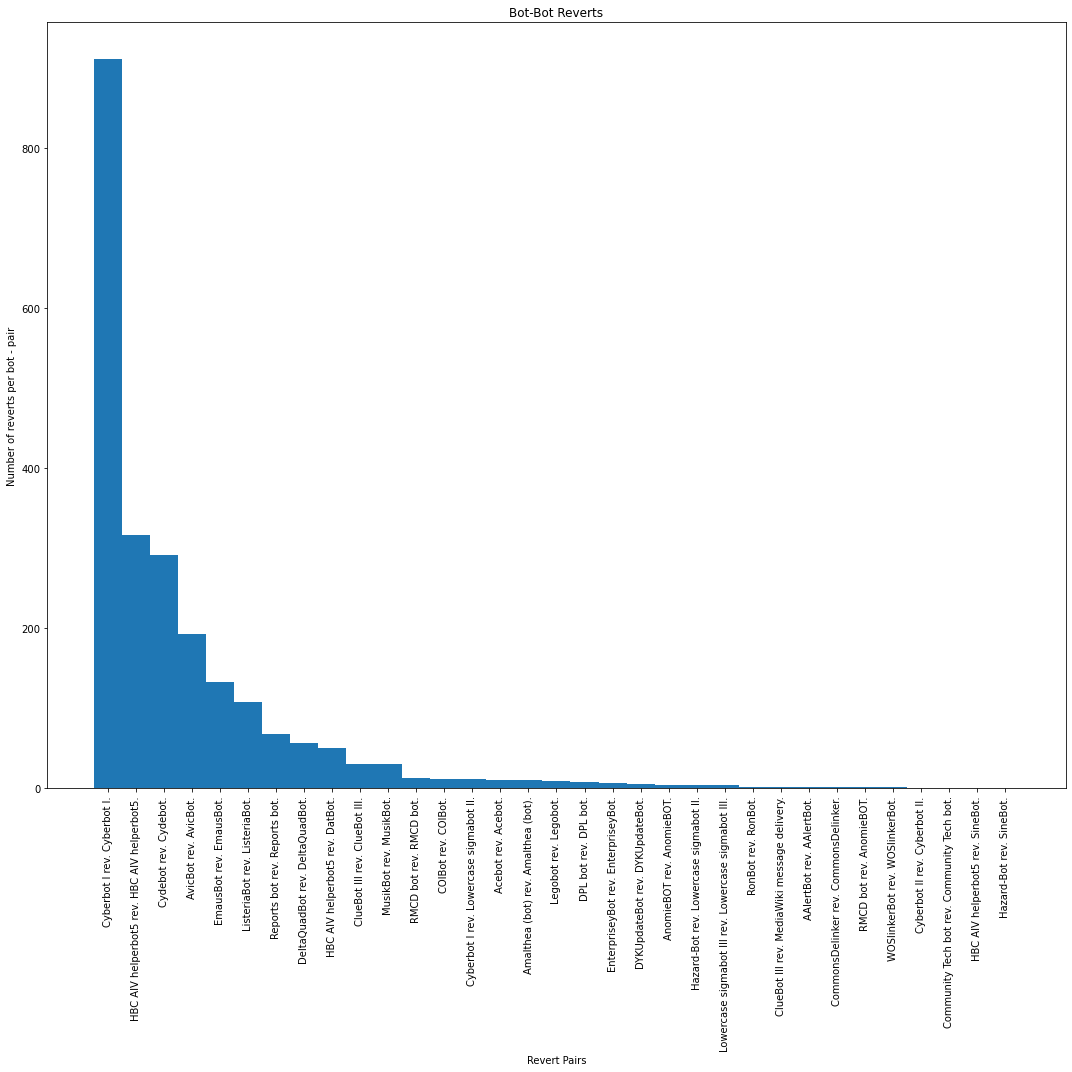

In [80]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15))

y = range(len(bot_pairs))
axes.bar(y, bot_pairs.rev_id, width=1)

axes.set_ylabel("Number of reverts per bot - pair")
axes.set_xlabel("Revert Pairs")
axes.set_title("Bot-Bot Reverts")

axes.set_xticks(y)
axes.set_xticklabels([f"{row.user_text_reverter} rev. {row.user_text}." for row in bot_pairs.itertuples()], rotation='vertical')

plt.tight_layout()
plt.show()